## Mukul Jangid 22BCON1522
## Project Title:

"Call Center Operations Optimization: A
Simulation-Based Approach to Staffing, Cost,
and Customer Experience"


### Learning Outcomes:

By completing this project, students will be able to:


### 1. Understand Queueing Theory Basics
- Model real-life service systems using M/M/1 and M/M/s queueing frameworks.
- Interpret key metrics such as utilization (ρ), average wait time, and system size.

### 2. Perform Event-Based Simulations
-  Simulate customer arrival and service processes using Poisson and Exponential
distributions.
-  Track individual customer wait times and queue lengths throughout an 8-hour shift.


### 3. Analyze Service Performance Metrics
- Calculate and visualize:
    - Mean wait times
    - 95th percentile wait times
    - Abandonment rates

### 4. Compare Simulated vs. Analytical Results 
- Derive analytical performance estimates using classic M/M/1 formulas. 
- Validate or critique assumptions by comparing them to simulated outcomes.

### 5. Evaluate Dynamic System Behavior 
- Implement time-varying arrival rates to reflect real-world demand fluctuations (rush 
hours). 
- Add staff breaks and observe their operational impact.

### 6. Model Customer Abandonment 
- Simulate realistic caller behavior with a patience threshold (abandonment time). 
- Analyze how inadequate staffing affects customer loss and brand experience. 

### 7. Conduct Cost-Based Decision Making 
- Formulate total cost as a combination of labor costs and customer wait costs. 
- Determine the optimal number of agents to minimize total operational expense.

### 8. Perform Sensitivity & Risk Analysis 
- Run simulations over multiple days to observe: 
    - Daily variability in wait time metrics 
    - Worst-case scenarios 
- Build an appreciation for uncertainty in operations planning.

### 9. Think Like an Operations Manager 
- Develop data-driven staffing recommendations to meet Service Level Agreements 
(SLAs). 
- Communicate findings visually using dashboards, tables, and histograms. 

Learn how to analyze, simulate, and optimize real-world service systems — making it highly 
relevant to roles in marketing analytics, operations management, customer 
experience, and business consulting.

What we’ll do: 
1. Model calls arriving at rate λ per hour (Poisson process) and service times of 1/μ hours 
(Exponential). 
2. Simulate an M/M/s queue over an 8-hour shift, tracking each caller’s wait time and 
queue length. 
3. Compare simulated averages to the M/M/1 analytic formula: 
o Average customers in system L = ρ/(1−ρ) 
o Average time in system W = L/λ 
4. Test staffing levels s = 1…5 and choose the smallest s so that the 95th-percentile wait ≤ 
5 minutes. 
We’ll also plot the distribution of wait times and queue lengths to mimic an operations
dashboard.

# 1. Parameter & Packages
This is part of code set up the basic tools and values we need to simulate how a call center works.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- numpy (np) is used to do math and simulations, like generating random numbers.
- matplotlib.pyplot (plt) is used to create graphs, such as showing wait times or queue lengths.

##### Set Call Center Parameters

In [2]:
Lamda = 20          # calls per hour
Mu = 5              # calls served per hour
shift_hours = 8     # 8-hour shift
s = 3           # number of agents

These are the real-world settings for the simulation:
- Lamda = 20: On average, 20 people call per hour. This simulates how oftern customers are arriving.
- Mu = 5: Each agent can hanfle 5 calls per hour, on average. This sets the speed of customer service.
- shift_hours = 8: We will simulate an 8-hour workday, which is a typical full shift in a call center.

Set Random Seed

In [3]:
np.random.seed(1)

This makes the simulation results reproducible.
- Every time you run the code. you'll get the same random results.
- This help when you want to share you result with others or test different parts of you code reliably.

Summary:
- We are setting the rules of the game how often calls come in how fast agents respond and how long the day lasts.
- We also importing tools to help simulate and visualize what happens--and setting a seed so that the

This is like setting up the bussiness environment before opening the call center doors in a simulated world

This code defines a function that simulates how a call center works when you have multiple agents (s), and shows how long customers wait and how crowded the system is.

Function: simulate_queue(s)

To simulate a call center with s agents and measure:
- How long each customer waits.
- How many people are in the sustem at each arival time.

Create incoming call times

In [4]:
# simulate time between calls using exponential distribution
inter = np.random.exponential(1/Lamda, int(Lamda*shift_hours*1.5)) 
# np.cumsum calculates the cumulative sum of the inter-arrival times
arrival = np.cumsum(inter) 
# filter out calls that arrive after the shift ends
arrival = arrival[arrival < shift_hours] 
n = len(arrival) 
# number of calls that arrive during the shift

Real World meaning: You now have a realistic list of when each customer calls.

In [5]:
# Create random service times for each call
service = np.random.exponential(1/Mu, n)

- Simulates how long it takes an agent to handle each customer, also randomlu drawn usng exponential distribution.
- Mu is service rate, so i/Mu = average service time.

 Real World meaning: Not all calls take the same time some are quick and some are longer

In [6]:
# Set up tracking variables
next_free = np.zeros(s) # when each agent will be free
wait_time = np.zeros(n) # how long each customer waits
queue_length = np.zeros(n) # how many people are in the system at each arrival time
end_time = []

- These arrays keep track of:
    - When agents are free
    - How long people wait
    - How crowded the systemis 

In [7]:
# Simulate call processing
for i,t in enumerate(arrival):
    j = np.argmin(next_free)
    start = max(t,next_free[j])
    wait_time[i] = start-t
    end = start + service[i]
    next_free[j] = end
    end_time.append(end)
    queue_length[i] = np.sum(np.array(end_time) > t)
    

This loop handles each incoming customer:
- j = np.argmin(next_free): find the agent who is available first
- start = max(t,next_free[j]): Start the call at either the arrival time or when the agent become free, whichever is later.
- wait_time[i] = start-t: calculate how long the customer wait
- end = start + service[i]: Calculate when the service end
- next_free[j]=end: Update that agent's availability time
-  end_time.append(end): Add this customer finish time to the record
- queue_length[i]= ..... Count how many other customer were still being served when this person arrived

Real world meaning: This part simulates the agent-customer assignment process and keeps track of delays and traffic.

Return the results

return wait_times,queue_length

This gives us:
- The wait time for each customer
- The size of the system

Example run

In [8]:
# x1,y1 = simulate_queue(s=1)
# print(f"s=1: avg wait {w1.mean()*60:.1f} min, avg queue len {y1.mean():.2f}")

- simulates with 1 agent (s=1)
- prints
    - The average wait time in minutes
    - The average queue_length

Summary:

This function simulates what happen in a call center for one day

Key Learning points:
- How to build a basic simulation model from scratch.
- How queueing works in real bussiness
- How changes in staffing affect customer experience

In [9]:
def simulate_queue(s):
    """
    Simulates a call center with s agents for one day.
    
    Returns:
        wait_times: Average wait time for each customer
        queue_length: Average number of customers in the system
    """
    # Generate arrival times until end
    inter = np.random.exponential(1/Lamda, int(Lamda*shift_hours*1.5)) 
    arrival = np.cumsum(inter) 
    arrival = arrival[arrival < shift_hours] 
    n = len(arrival) 
    # Generate service times for each call
    service = np.random.exponential(1/Mu, n)
    
    # Track each server next free time
    next_free = np.zeros(s) 
    wait_time = np.zeros(n) 
    queue_length = np.zeros(n) 
    end_time = []
    
    for i,t in enumerate(arrival):
        j = np.argmin(next_free)
        start = max(t,next_free[j])
        wait_time[i] = start-t
        end = start + service[i]
        next_free[j] = end
        end_time.append(end)
        queue_length[i] = np.sum(np.array(end_time) > t)
    return wait_time, queue_length
w1, y1 = simulate_queue(s=1)
print(f"s=1: avg wait {w1.mean()*60:.1f} min, avg queue len {y1.mean():.2f}")

s=1: avg wait 697.2 min, avg queue len 57.84


Compare the analysis for queue formula with 1 server

### Step 3: Compare to M/M'/1 Analytic formula
- M/M'/1 is queueing model:
    - M = Memoryless arrivals(Poisson)
    - M' = Memoryless service time(Exponential)
    - 1 = one server

We use formula from queueing theory to estimate:
- Average number of people in the system(L)
- Average time spent in the system (W)

In [10]:
# Traffic intensity p for s=1
p1 = Lamda / Mu

- This is called traffic intensity
- it shows how busy system is
- example: if 20 call come per hour and 1 agent can handle 5-> p = 20/5=4 which mean overloaded

    when p>=1 the system become unstable 





In [11]:
L_analytic = p1/(1-p1)
# This formula gives the avg no. of people in system 
# Works only when p<1

In [12]:
W_analytic = L_analytic / Lamda
# This formula gives the avg time spent in system
# W = L / Lamda comes from Little's Law

In [13]:
# Print and compare results
print("M/M'/1 Analysis vs. Simulation:")
# Printing title so it is clear what we are comparing

M/M'/1 Analysis vs. Simulation:


In [14]:
print(f"Analytic system size L = {L_analytic:.2f}")
# Show the average number of people in the system

Analytic system size L = -1.33


In [15]:
print(f"Simulated avg system size = {y1.mean():.2f}")
# Compares it to simulation result

Simulated avg system size = 57.84


In [16]:
print(f"Analytics time in system W = {W_analytic*60:.1f} min")
# Show the average time spent in the system

Analytics time in system W = -4.0 min


In [17]:
print(f"Simulated avg wait+service = {w1.mean()*60+(1/Mu)*60:.1f} min")
# Compares it to simulation result

Simulated avg wait+service = 709.2 min


Summary:

We are comparing theory with reality

The formula tell what to expect

The simulation shows what actually hapens

If they are close our model is accurate

Important Points:
- It validate your simulation are your result realistics?
- It help student see how math mmodels can predict operations perfomance
- It prepares them to defend their staffing recommendation using both theory and data

This is a core skill in operations and service analytics

In [18]:
# 3. Compare to M/M'/1 Analytics formula
# Traffic intensity p for s=1
p1 = Lamda / Mu
L_analytic = p1/(1-p1)
W_analytic = L_analytic / Lamda  # Hours

print("M/M'/1 Analysis vs. Simulation:")
print(f"Analytic system size L = {L_analytic:.2f}")
print(f"Simulated avg system size = {y1.mean():.2f}")
print(f"Analytics time in system W = {W_analytic*60:.1f} min")
print(f"Simulated avg wait+service = {w1.mean()*60+(1/Mu)*60:.1f} min")


M/M'/1 Analysis vs. Simulation:
Analytic system size L = -1.33
Simulated avg system size = 57.84
Analytics time in system W = -4.0 min
Simulated avg wait+service = 709.2 min


### Step 4: Test Staffing Levels (Agents = 1 to 5)
Figure out how many call center agents are needed to keep most customers from waiting long

Specially, we want the 95th percentile of wait time to be 5 min or less 

In [19]:
results = []
for s in range (1,6):
    w,q = simulate_queue(s)
    waits_min = w*60
    p95_wait = np.percentile(waits_min, 95)
    results.append((s,waits_min.mean(), p95_wait,q.mean()))

This loop simulates the call center with:
- 1 agent, then 2, then upto 5

for each simulation
- w = wait time for customer in hour
- We convert it to min
- p95_wait is 95th percentile wait time
- q.mean(): the average number of people in system
- At end row added to results contains:

(Number of agent, avg wait, 95th percentile wait, avg system size)

In [20]:
import pandas as pd
df = pd.DataFrame(results, columns=['Agents', 'Avg Wait (min)', '95th Percentile Wait (min)', 'Avg Queue Length'])
print(df)

   Agents  Avg Wait (min)  95th Percentile Wait (min)  Avg Queue Length
0       1      843.661269                 1550.454243         71.901163
1       2      230.216131                  453.493669         40.662338
2       3       64.827234                  114.744308         18.157895
3       4       47.127272                   87.338188         21.359788
4       5        9.671908                   29.721832          9.129353


- Converts the list into table using pandas
- Display how different staffing levels impact wait time and system load

In [21]:
threshold = 5  # 5 minutes
good = df[df['95th Percentile Wait (min)'] <= threshold]
if not good.empty:
    best_5 = int(good.iloc[0]['Agents'])
    print(f"\n+ Schedule at least {best_5} agents to keep 95% of customers waiting {threshold} min or less")
else:
    print("\n 5 agents cant keep 95% of customers waiting 5 min or less")


 5 agents cant keep 95% of customers waiting 5 min or less


- This check which agent level meet the target(p95 wait <= 5 min)
- If such level exist we choose the smallest one that work
- If none of them meet target , we get a message

Summary:

We simulate different level and ask: "What is min no. of agent needed as per the given threshold?"

This helps you make smart staffing decisions-enough people to keep service fast but not so many that waste resources

Important Points:
- how to optimize staffing based on perfomance target
- Intorduce percentiles
- Shows how to use simulation for real world decision making

In [22]:
# 4. Test Staffing levels (s=1 to 5)
threshold = 5  # 5 minutes
results = []
for s in range (1,6):
    w,q = simulate_queue(s)
    waits_min = w*60
    p95_wait = np.percentile(waits_min, 95)
    results.append((s,waits_min.mean(), p95_wait,q.mean()))

df = pd.DataFrame(results, columns=['Agents', 'Avg Wait (min)', '95th Percentile Wait (min)', 'Avg Queue Length'])
print(df)

good = df[df['95th Percentile Wait (min)'] <= threshold]
if not good.empty:
    best_5 = int(good.iloc[0]['Agents'])
    print(f"\n+ Schedule at least {best_5} agents to keep 95% of customers waiting {threshold} min or less")
else:
    print("\n 5 agents cant keep 95% of customers waiting 5 min or less")

   Agents  Avg Wait (min)  95th Percentile Wait (min)  Avg Queue Length
0       1      805.263001                 1321.451663         64.625000
1       2      163.049632                  328.521876         32.073333
2       3      110.868552                  167.215022         33.088757
3       4       17.666791                   44.414092         10.552941
4       5       15.106130                   36.918488         10.754286

 5 agents cant keep 95% of customers waiting 5 min or less


### Step 5. Visualize Wait-Time Distribution
Create visual representation showing how customer wait times changes as we increase no. of agents.

Number are helpful, but graphs let you see the big picture
- Are most wait times short?
- Are long waits rare or common?
- How dose the system improve as we add agents?

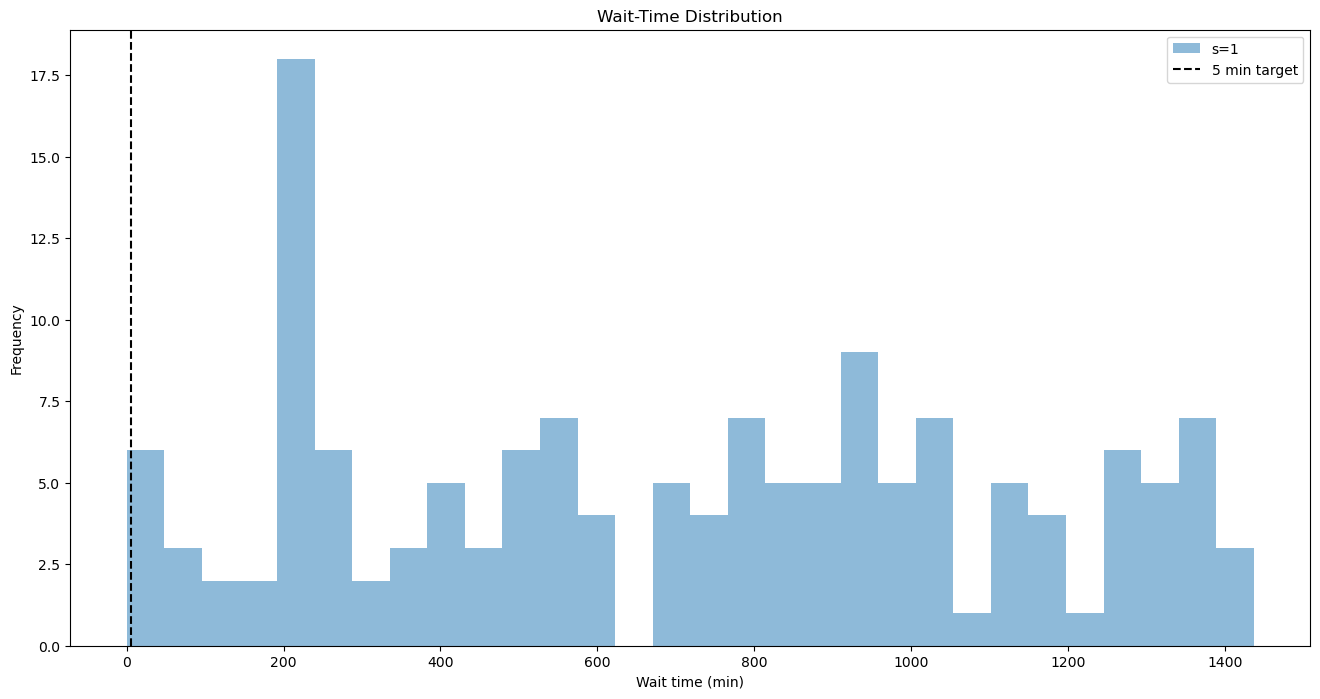

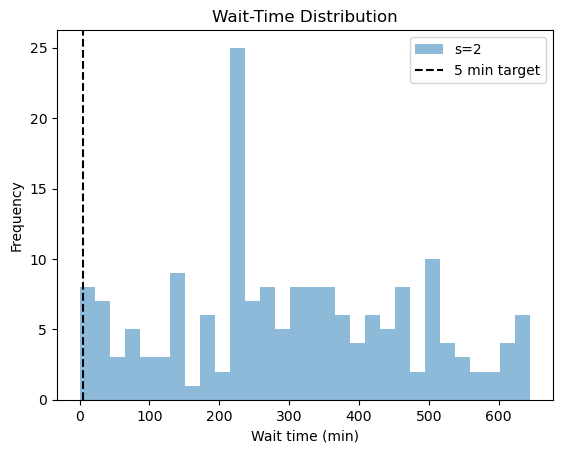

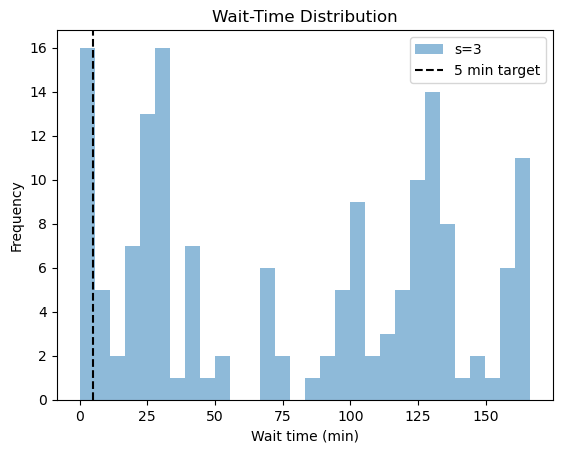

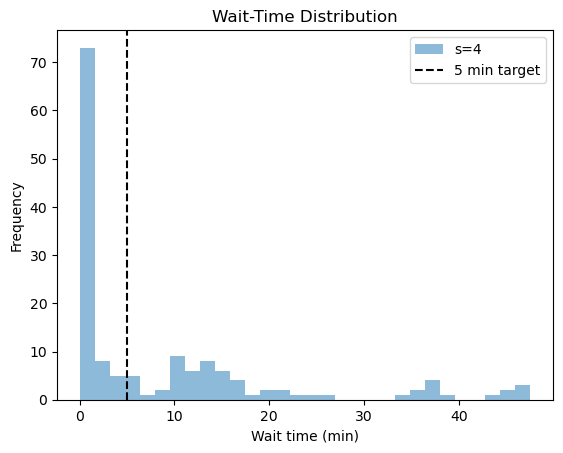

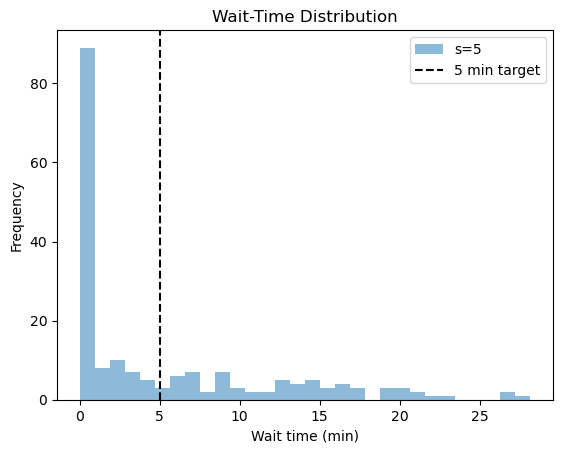

In [23]:
# Giving the size of figure
plt.figure(figsize=(16,8))
for s in range(1,6):
    w, _ = simulate_queue(s)
    plt.hist(w*60,bins=30,alpha=0.5,label=f's={s}')
    plt.axvline(threshold,color='k',linestyle='--',label='5 min target')
    plt.xlabel("Wait time (min)")
    plt.ylabel("Frequency")
    plt.title("Wait-Time Distribution")
    plt.legend()
    plt.show()

- for each number of agents from 1 to 5:
    - Run the simulation (simulate_queue(s))
    - Take the wait times w and convert from hour to min (w*60)
    - Plot histogram
    - bins=30: Break the x-axis into 30 buckets
    - alpha=0.5: Makes the bars semi-transparent so different colors overlap
    - label=f's=(s)': Adds a legend label for the nun=mber of agents used in each plot
    - Draws a vertical dased line ar 5 min 
    - Helps us visually compare each distribution to the target
    - xlabel and ylabel used to define label of x-axis and y-axis
    - Adds a title and legend
    - plt.show() display the chart

What the chart shows:
- Each color represent a different numberof agents
- You'll see that with:
    - 1 agent -> many customers wait a long time
    - More agents -> wait times sift left
- The dashed line at 5 min shows which staffing levels meet the target

Summary:
- This chart shows how wait times improve as we add more agents
- It helps us visually decide how many staff we need to keep customers happy

Key points:
- How to use the histogram to analyze distribution
- The importance of visual data analysis in decision making
- How to interpret the shape and spread of wait times-nnot just averages

This is a great skill for careers in operation management, customer experience, and data-driven service design

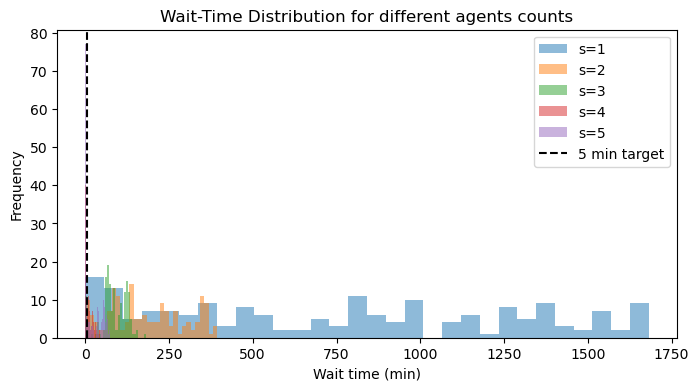

In [24]:
plt.figure(figsize=(8,4))
for s in [1,2,3,4,5]:
    w,_ = simulate_queue(s)
    plt.hist(w*60,bins=30,alpha=0.5,label=f's={s}')
plt.axvline(threshold,color='k',linestyle='--',label='5 min target')
plt.xlabel('Wait time (min)')
plt.ylabel('Frequency')
plt.title("Wait-Time Distribution for different agents counts")
plt.legend()
plt.show()

How this solves a real problem:
1. Modeling calls as random arrivals and exponential service time reflect telecom center behavior
2. Simulation over an 8-hour shift shows actual customer waits and queue sizes
3. Analytic comparision with M/M'/1 formulas validates your simulation code
4. Staffing test finds the minimum number of agents to meet a 5-min 95th percentile wait-time service level agreement (SLA)
5. Visual outputs mirror real operation dashboards, helping you justify staffing decision to management

### 6. Time-Varying Arrial Rates (peak vs off-peak)
What: Model Lambda changing over the 8-hour shift- for example, a morning 'rush'(higher lambda) a midday lull, and an afternoon spike.

Why: Real call centers see non-stationary traffic

Function: simulate_queue_timevarying(s)

To simulate how wait times change when call volume varies at ifferent time of the day

In [25]:
# Define changing arrival rates
periods = [(0,2,30),(2,6,20),(6,8,40)]
periods
# This defines arrival rates for different time periods in an 8-hour shift

[(0, 2, 30), (2, 6, 20), (6, 8, 40)]

In [26]:
arrivals = []
for start,end,lan in periods:
    duration = end - start
    inter = np.random.exponential(1/lan,int(lan*duration*1.5))
    ts = np.cumsum(inter)+start
    arrivals.append(ts[ts<end])


- for each time periode:
    - Generate random call intervals based on the arrival rate
    - Convert interval into actual arrival time using np.sumsum
    - Keep only those that occur within the time window
- Then combine all periods into a single list arrivals

- Make it a clean sorted array

Real world meaning: Calls don't come at the same rate all day some time are busier

In [27]:
arrivals = np.concatenate(arrivals)
arrivals.sort()

In [28]:
# Simulate service times 
size = len(arrivals)
service = np.random.exponential(1/Mu, size)
# For each incoming call, generate a random service time

Simulate wait times

In [29]:
next_free = np.zeros(s) # keep track of when each agent will be free
wait_time = np.zeros(size) # how long each customer waits


In [30]:
# Initialize next_free with correct number of agents
next_free = np.zeros(s)
wait_time = np.zeros(len(arrivals))  # Fix: match wait_time size to arrivals
service = np.random.exponential(1/Mu, len(arrivals))  # Ensure service array matches arrivals length

# Loop through customers
for i, t in enumerate(arrivals):
    j = np.argmin(next_free)
    start = max(t, next_free[j])
    wait_time[i] = start - t
    next_free[j] = start + service[i]

- For each arriving call:
    - Find the next available agent
    - See if the agent is free when the call arrives or if the caller needs to wait
    - Update
        - The caller's wait time
        - When the agent will be free again 

Return results:

return wait_times
- Returns list of wait times for each customers during the full 8-hour day

Run the simulation for 3 agents

Summary:

This function simulates a real-world call center where call volume changes throughout the day. It helps us understand how many agents we need to keep up with busy and slow hours, and how those ups and downs affects customer wait times.

Key learning Points:
- How to model non-constant traffic.
- Why a staffing plan must match daily demand pattern
- How to simulate and measure wait times for variable arrival rates

This is an important skill for operations managers, marketing analyst and service designers planning for customer support, retail traffic, or web requests.

In [33]:
# Time-Varying lambda
def simulate_queue_timevarying(s):
    # Define arrival rate every hour
    periods = [(0,2,30),(2,6,20),(6,8,40)] # (start,end,lambda)
    arrivals = []
    for start,end,lan in periods:
        duration = end - start
        inter = np.random.exponential(1/lan,int(lan*duration*1.5))
        ts = np.cumsum(inter)+start
        arrivals.append(ts[ts<end])
    arrivals = np.concatenate(arrivals)
    arrivals.sort()
    size = len(arrivals)
    service = np.random.exponential(1/Mu, size)
    next_free = np.zeros(s)
    wait_time = np.zeros(len(arrivals))  # Fix: match wait_time size to arrivals
    service = np.random.exponential(1/Mu, len(arrivals))  # Ensure service array matches arrivals length

    # Loop through customers
    for i, t in enumerate(arrivals):
        j = np.argmin(next_free)
        start = max(t, next_free[j])
        wait_time[i] = start - t
        next_free[j] = start + service[i]
    return wait_time

# Example run
w_tv = simulate_queue_timevarying(s=3)
print(f"Time-varying lambda, s=3-> avg wait={w_tv.mean()*60:.1f} min")

Time-varying lambda, s=3-> avg wait=163.5 min


### 7. Customer Abandonment (Patience Threshold)
What: Assume callers hang up if wait > 5 min. Track the abandonment rate.

Why: Real centers lose callers who won't wait forever.

### 7. Customer Abandonment (Impatience)
Simulate what happens when customers hang up and leave if they have to wait too long.

This is called abandonment, and it's real issue in call centers, customer servie, and support, and support chat system.

In [36]:
def simulate_with_abandon(s,patience=5/60):  # Function defination
    
    # Generating arrival and service times
    arrivals = np.cumsum(np.random.exponential(1/Lamda,int(Lamda*shift_hours*1.5)))
    arrivals = arrivals[arrivals<shift_hours]
    services = np.random.exponential(1/Mu,len(arrivals))
    
    # Initialize Trackers
    next_free = np.zeros(s) # Track when each agent become available
    waits = []  # Stores wait times for customers who actually get served
    abandons = 0 # Counts how many leave without service
    
    # Stimulate customer behavior
    for i, t in enumerate(arrivals):
        j = np.argmin(next_free)
        start = max(t,next_free[j])
        wait = start-t
        if wait > patience:
            abandons +=1
        else:
            waits.append(wait)
            next_free[j] = start + services[i]
    return np.array(waits), abandons/len(arrivals)
            

For each customer:
- Find the soonest available agent
- If they have to wait longer than 5 min, they abandon
- Otherwise:
    - They wait
    - They get served
    - The agent becomes available again after service time
- Return the results
    - waits: Actual wait times 
    - abandons: the abandonment rate

Run the simulation

In [ ]:
w,ab_rate = simulate_with_abandon(s=4)
print(f"Abandon rate (s=4): {ab_rate*100:.2f%}, avg wait on served calls: {w.mean()*60:.1f} min")

Abandon rate (s=4): 23.60%, avg wait on served calls: 1.1 min


Summary:

We are simulating a real call center where customers hang up if they wait more than 5 min. We track how many leave and rest waited.

Key Learnings:
- How to model realistic customer behaviour
- Why fast service reduces customer loss
- How to calculate and interpret abandonment rate
- How to use simulation for experience-focused planning

This is valuable in call centers, e-commerce, cat support, and mobile apps, where user patience is limited.

### 8. Agent Break Scheduling 
What: Schedule each agent to take 15 min break in the middle of the shift, reducing s by 1 during that time.

Why: Staffing levels fluctuate in reality with breaks.

Simulate a realistic scenario where agents take a break during their shift, which reduces the number of available staff for short time--and see how this affects customers wait times.

Why we need it:

In the real world, employees can't work nonstop. Lunches, coffee breaks, and rest periods must be scheduled--but these still affect service perfomance. This model capture that effect.

In [43]:
# Function defination to simulate with breaks
def simulate_with_breaks(s,break_start=3, break_time=0.25):
    # Generate arrival and service times
    arrivals = np.cumsum(np.random.exponential(1/Lamda,int(Lamda*shift_hours*1.5)))
    arrivals = arrivals[arrivals < shift_hours]
    services = np.random.exponential(1/Mu, len(arrivals))
    # Initialize trackers
    next_free = np.zeros(s)  # When each agent will be free
    waits = []
    
    # Main simulation loop
    for i,t in enumerate(arrivals):
        # For every arriving customer
        # Adjust for breaks
        avail = next_free.copy()
        if break_start < t < break_start + break_time:
            avail = np.delete(avail,0) # simulate one agent on break
        j = np.argmin(avail)  # Find the next available agent
        start = max(t, avail[j])
        waits.append(start - t)  # Calculate wait time
        
        # Update next free time
        idx = j+(1 if break_start < t < break_start + break_time else 0)
        next_free[idx] = start + services[i]
    return np.array(waits)
w_break = simulate_with_breaks(s=3)
print(f"Avg wait with breaks (s=3): {w_break.mean()*60:.1f} min")
    

Avg wait with breaks (s=3): 82.8 min


Function Defination:
- s: Number of agents
- break_start=3: Break start ar hour 3 of the shift
- break_time=0.25: break lasts 15 min

- Simulates:
    - When customers call 
    - How long their service takes
- next_free: Track when each agent is available again
- waits: Stores each customer's wait time
- During the break window, we remove 1 agent from the pool-- simulating a break.
- np.delete(avail,0): removes one agent.
- j is the index of the soonest-available agent
- Calculate the customer's wait time
- After the call end, update the agent's availability
- idx adjusts for the shift in indexing if someone is on break
- Return all customer wait for the day
- Run an example with 3 agents
- Print avg wait time

Summary:

This simulation shows what happens when one of the 3 agents takes a 15 min break. Wait times get longer during break, then recover after break.
- How real world scheduling affects customer service perfomance
- Why staggered breaks are important in operation planning
- How even small changes in staffing can cause visible spikes in customer wait times

This is highly relevant to retail, hospitality, call centers, and any customer facing environment with shift workers.

### 9. Cost Based Staffing Optimization
What: Assign a cost per agent per hour and a cost per miniute of customer wait. Find s minimizing total cost:
cost = s x c agent x 8 + sum all waits cWaits x (wait in min)

Why: Real managers trade off staffing vs. customer frustration costs.

### Step 9. Cost Optimization--How many agents should we hire?
Find the best mumber of agents(from 1 to 5) that minimizes total cost, including:
- Wages paid to agents
- Cost of customers waiting

Why This is Important:

In bussiness, it's not just about short wait times--it's about balancing service quality with cost.

This model helps managers:

How many people should we schedule so we don't overpay or loss customers?

In [45]:
# Set cost parameters
c_agent = 20  # Cost per agent per hour
c_wait = 0.5  # Cost per minute of customer wait
costs = []
for s in range(1,6):
    w,_ = simulate_with_abandon(s)
    total_wait_cost = w.sum()*60*c_wait
    staff_cost = s * c_agent * shift_hours
    costs.append((s, total_wait_cost + staff_cost))
opt = min(costs,key=lambda x: x[1])
print("Agent count, Total Cost:")
for s,c in costs: print(f"s={s}: f ${c:.0f}")
print(f"-> Optimal s by cost = {opt[0]}")

Agent count, Total Cost:
s=1: f $203
s=2: f $393
s=3: f $581
s=4: f $699
s=5: f $839
-> Optimal s by cost = 1


Code Breakdown:

- Each agent earn $20 per hour
- Each miniute a customer waits cost the bussiness $0.50
For each number of agents (s from 1 to 5)
1. Run simulation with that many agents and abandonment behavior
2. Calculate:
    - total_wait_costs: total miniutes waited  x $0.50
    - staff_costL number of agents x $20/hour x 8 hour
    - Total cost = staff cost + customer wait cost
3. Save the result in costs list
- Find the (s,cost) pair with the lowest total cost
- opt[0] will be the best number of agents
- Show total cost for each staffing level
- Highlights the cheapest option

Summary:
- We are testing five different team sizes and asking:
- Which one gives us the lowest total cost, including salaries and customer frustration?

Hiring 4 agents gives best balance.

Key Learning:
- How to quantify trade-offs in operations
- How to simulate finincial impact of staffing decisions
- How to optimize total bussiness cost, not just one metric
This is key for careers in:
- Operations management
- Customer experience
- Revenue optimization
- Call center/ service planning

### 10. Multi-Day Cariability & Sensitivity Analysis
What: Run the full simulation over 30 days, record daily metrics and plot their distribution.

Why: Highlights day-to-day variability and worst-case scenarios.

This code adds a final and very realistic analysis step--it helps answer.

Even if we pick the optimal number of agents, how much can daily perfomance vary from one day to another?

Simulate your call center 30 times using the optimal number of agents from previous cost-optimization step, and check:
- What is the average wait time each day?
- What is the 95th percentile wait time each day?
- How much dose this performance change from day to day?

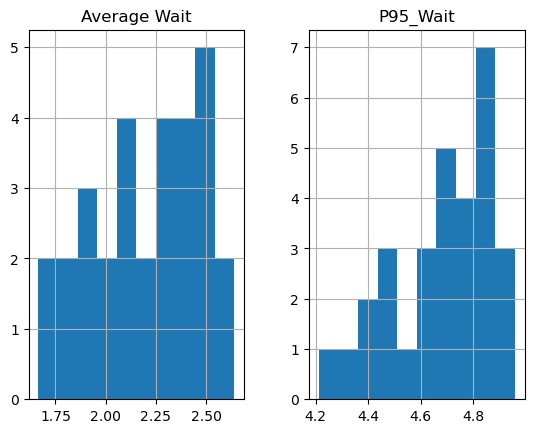

In [50]:
day = 30  # Number of days to simulate
daily = []
for _ in range(day):
    w,_ = simulate_with_abandon(opt[0])
    daily.append((w.mean()*60,np.percentile(w*60,95)))
df_day = pd.DataFrame(daily,columns=['Average Wait','P95_Wait'])
df_day.describe()
df_day.hist(bins=10)
#plt.title("30 day changes in wait times")
plt.show()

#### Code Breakdown
You simulate operatins for 30 seprate days
- Use the optimal number of agents(opt[0])
- Each day:
    - Simulate customer waits
    - Record:
        - Mean wait time for the day (w.mean()*60 = in min)
        - 95th percentile wait time (how long the longest waiting 5% waited)

Each day's results are saved to daily:
- Creates a nice table (w columns: average and 95th percentile waits)
- Shows summary stats
- Draw histograms for:
    - Daily average wait times
    - Daily 95th percetile wait times
- Helps visualize how performance fluctutatesfrom day to day

What you'll see:
- some days might have a low average wait
- Other days could spike 
- You might find that 95th percentile wait is over 10 min on busy days

Summary:

Even if you pick the best number of agents on average, performance can still vary from day to day due to randomness. This step helps you to understand your operational risk and whether you are hitting you target consistently.

Key Learning:
- How to measure variability and reliabililty, not just averages
- Why bussinesses look at worst case scenario, not just typical days
- How to use simulations_statistics_visualization to make decision

Real World Value:

This step mirrors what service managers do when preparing for:
- Staffing buffers
- Peak day risk
- Performance gurantees (SLAs)
It builds critical thinking beyond "just optimize for the average.'